# House pricing

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb

from matplotlib import pyplot as plt

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

import plotly.graph_objs as go#visualization

%matplotlib inline

## Load data

In [3]:
df_train = pd.read_csv("train.csv")
print(df_train.shape)
df_train.head(5)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test = pd.read_csv("test.csv")
print(df_test.shape)
df_test.head(5)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
cat_cols = [
    'MSSubClass', 'MSZoning', 'Street',
    'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'OverallQual', 'OverallCond',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual',
    'GarageCond', 'PavedDrive', 'PoolQC',
    'Fence', 'MiscFeature', 'SaleType',
    'SaleCondition'
]
num_cols = [
    'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'    
]
target = "SalePrice"
key = "Id"

## Valeurs manquantes

In [6]:
train_cat_cols_null_values = df_train[cat_cols].isnull().sum(axis=0)
train_cat_cols_null_values

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondit

For categorical columns with missing values, add an extra value encoding missing data property.

In [7]:
cat_cols_with_missing_values = train_cat_cols_null_values[train_cat_cols_null_values > 0].keys()
for cat_col in cat_cols_with_missing_values:
    if df_train[cat_col].dtype == "int64":
        df_train[cat_col] = -1
    if df_train[cat_col].dtype == "object":
        df_train[cat_col] = 'None'

In [8]:
train_num_cols_null_values = df_train[num_cols].isnull().sum(axis=0)
train_num_cols_null_values

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [9]:
num_cols_with_missing_values = train_num_cols_null_values[train_num_cols_null_values > 0].keys()
for num_col in num_cols_with_missing_values:
    if df_train[num_col].dtype == "int64" or df_train[num_col].dtype == "float64":
        df_train[num_col] = -1

## Exploration

#### Sale prices

In [10]:
data = [go.Histogram(x=df_train["SalePrice"])]

layout = go.Layout(dict(title = "Sale price distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

fig = go.Figure(data=data,layout = layout)

py.iplot(fig)

### Variables distributions

In [11]:
def plot_pie(df, column) :
    
    trace = go.Pie(values  = df[column].value_counts().values.tolist(),
                    labels  = df[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    
    layout = go.Layout(dict(title = column + " distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)"
                           )
                      )
    data = [trace]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [12]:
def histogram(df, column) :
    trace = go.Histogram(x  = df[column],
                          histnorm= "percent",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    data = [trace]
    layout = go.Layout(dict(title =column + " distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                         zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [13]:
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(df_train,i)
    
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(df_train, i)

## Features engineering

In [104]:
df = pd.concat([df_train, df_test], axis=0)

### Categorization

In [105]:
df.loc[df["OverallQual"].isin([1,2,3,4]), "OverallQual"] = 1
df.loc[df["OverallQual"].isin([5]), "OverallQual"] = 2
df.loc[df["OverallQual"].isin([6,7,8,9,10]), "OverallQual"] = 3

plot_pie(df, "OverallQual")

In [106]:
df.loc[df["OverallCond"].isin([1,2,3,4]), "OverallCond"] = 1
df.loc[df["OverallCond"].isin([5]), "OverallCond"] = 2
df.loc[df["OverallCond"].isin([6,7,8,9,10]), "OverallCond"] = 3

plot_pie(df, "OverallCond")

In [107]:
df.loc[df["SaleType"].isin(['WD','CWD','VWD']), "SaleType"] = 'Warranty'
df.loc[df["SaleType"].isin(['ConLD','ConLI','ConLw','Con']), "SaleType"] = 'Contract'

plot_pie(df, "SaleType")

### Dummies variable

In [108]:
df = pd.get_dummies(df)

In [109]:
features = df.columns.tolist()
features.remove(target)
features.remove(key)

### New features

In [110]:
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

df.loc[df["HouseAge"] < 5, "HouseAge_0to5"] = 1
df.loc[(df["HouseAge"] >= 5) & (df["HouseAge"] < 20), "HouseAge_5to20"] = 1
df.loc[(df["HouseAge"] >= 20) & (df["HouseAge"] < 40), "HouseAge_20to40"] = 1
df.loc[(df["HouseAge"] >= 40) & (df["HouseAge"] < 60), "HouseAge_40to60"] = 1
df.loc[(df["HouseAge"] >= 60), "HouseAge_60+"] = 1

features.append("HouseAge_0to5")
features.append("HouseAge_5to20")
features.append("HouseAge_20to40")
features.append("HouseAge_40to60")
features.append("HouseAge_60+")

histogram(df, "HouseAge")

In [111]:
df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]

df.loc[df["RemodAge"] < 5, "RemodAge_0to5"] = 1
df.loc[(df["RemodAge"] >= 5) & (df["RemodAge"] < 20), "RemodAge_5to20"] = 1
df.loc[(df["RemodAge"] >= 20) & (df["RemodAge"] < 40), "RemodAge_20to40"] = 1
df.loc[(df["RemodAge"] >= 40) & (df["RemodAge"] < 60), "RemodAge_40to60"] = 1
df.loc[(df["RemodAge"] >= 60), "RemodAge_60+"] = 1

features.append("RemodAge_0to5")
features.append("RemodAge_5to20")
features.append("RemodAge_20to40")
features.append("RemodAge_40to60")
features.append("RemodAge_60+")

histogram(df, "RemodAge")

### Replace missing values

In [112]:
null_values = df[features].isnull().sum(axis=0)
cols_with_missing_values = null_values[null_values > 0].keys()
for col in cols_with_missing_values:
    if df[col].dtype in ("int64", "float64"):
        df[col] = -1
    if df[col].dtype == "object":
        df[col] = 'None'

In [113]:
train_set = df.iloc[range(len(df_train))]
test_set = df.iloc[range(len(df_train), len(df_train) + len(df_test))]

## Modelisation

### Variables selection

In [114]:
def explicability(weights, columns, first=10):
    """
    Representer le poids des variables explicatives
    """
    weights = weights.reshape(-1)
    idx = weights.argsort()[::-1][:first]
    x = np.arange(first)
    y = weights[idx]
    labels = columns[idx]

    plt.close('all')
    fig, ax = plt.subplots(figsize=(18, 4))

    ax.bar(x, y, width=0.5, align='center')
    ax.set_xlabel(u"Variables explicatives")
    ax.set_ylabel(u"Poids")

    plt.xticks(x, labels, rotation=80)
    plt.title(u"Poids des variables explicatives")
    plt.show()

    filename = "features_weights.csv"
    features_weights = []
    with open(filename, 'w') as f:
        for x in zip(labels, y):
            f.write(x[0])
            f.write("\t")
            f.write(str(x[1]))
            f.write("\n")
            features_weights.append(x)
    return labels


def score_with_components(clf, X, y, X_test, y_test, columns, weights, M=10, first=10):
    """
    Calculer les scores en fonction du nombre de composants
    """
    dict_feat_import = {
        'feature_names': list(columns),
        'feat_importance': list(weights)
    }

    feat_import_df = pd.DataFrame.from_dict(dict_feat_import, orient='columns')
    sort_feat_import_df = feat_import_df.sort_values(by=['feat_importance'], ascending=[0]).reset_index(drop=True)
    sorted_vect_importance = np.sort(weights, kind='heapsort')

    sorted_vect_importance[:] = sorted_vect_importance[::-1]
    score_mean = []
    error_on_mean_score = []
    n_th_most_important_features = []
    last_included_feat = []

    df_X = pd.DataFrame(X, columns=columns)
    df_y = pd.DataFrame(y)

    df_X_test = pd.DataFrame(X_test, columns=columns)
    df_y_test = pd.DataFrame(y_test)

    for ind in range(first):
        if ind % 10 == 0:
            print('ind = ' + ind.__str__())

        last_included_feat.append(list(sort_feat_import_df['feature_names'].head(ind + 1))[-1])
        X_new = df_X[list(sort_feat_import_df['feature_names'].head(ind + 1))]
        X_new_test = df_X_test[list(sort_feat_import_df['feature_names'].head(ind + 1))]

        scores = []
        for m in range(M):
            clf.fit(X_new, np.ravel(df_y))

            scores.append(clf.score(X_new_test, np.ravel(df_y_test)))

        error_on_mean_score.append(np.std(scores) / np.sqrt(M - 1))
        score_mean.append(np.mean(scores))
        n_th_most_important_features.append(ind + 1)

    return n_th_most_important_features, score_mean, error_on_mean_score, sort_feat_import_df


def plot_score_with_components(n_th_most_important_features, score_mean,
                               error_on_mean_score, sort_feat_import_df):
    """
    Tracer les scores en fonction du nombre de composants
    """
    x = n_th_most_important_features
    y = score_mean
    yerr = error_on_mean_score
    plt.clf()
    plt.close()
    plt.close('all')

    fig = plt.figure(figsize=(22.0, 13.0))
    plt.errorbar(x, y, yerr=yerr, fmt='o', linestyle='-', color='b')
    plt.title('mean score for n-th most important features', fontsize=22)
    ax = plt.gca()
    ax.legend_ = None
    plt.xlabel('nb of components considered ', fontsize=22)
    plt.ylabel('scores', fontsize=22)
    plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
    axes = plt.gca()
    axes.set_xlim([0, len(n_th_most_important_features)])
    plt.tight_layout()
    plt.show()

    plt.clf()
    plt.close()
    plt.close('all')


def filter_correlated_variables(df, features_name, threshold=0.9):
    """
    filter variable from data set which overpass a correlation threshold.

    Args:
        df: a pandas dataframe data set
        features_name: a list of variable names
        threshold: the correlation threshold from which variables are filtered
    Returns:
        the features name filtered
    """
    features_to_keep = set(features_name)

    corr = df[features_name].corr(method="pearson").abs()
    for f1 in features_name:
        for f2 in features_name:
            if f1 != f2 and corr.loc[f1, f2] > threshold and f2 in features_to_keep and f1 in features_to_keep:
                print("%s is too much correlated to %s" % (f2, f1))
                features_to_keep.remove(f2)
    return list(features_to_keep)

#### Remove variables too correlated to each other

In [115]:
features = filter_correlated_variables(train_set, features, threshold=0.9)
len(features)

CentralAir_Y is too much correlated to CentralAir_N
ExterQual_TA is too much correlated to ExterQual_Gd
Exterior2nd_CBlock is too much correlated to Exterior1st_CBlock
Exterior2nd_CmentBd is too much correlated to Exterior1st_CemntBd
Exterior2nd_MetalSd is too much correlated to Exterior1st_MetalSd
Exterior2nd_VinylSd is too much correlated to Exterior1st_VinylSd
LandSlope_Mod is too much correlated to LandSlope_Gtl
LotShape_Reg is too much correlated to LotShape_IR1
RoofStyle_Hip is too much correlated to RoofStyle_Gable
SaleType_New is too much correlated to SaleCondition_Partial
Street_Pave is too much correlated to Street_Grvl
Utilities_NoSeWa is too much correlated to Utilities_AllPub


293

#### Compute features importance

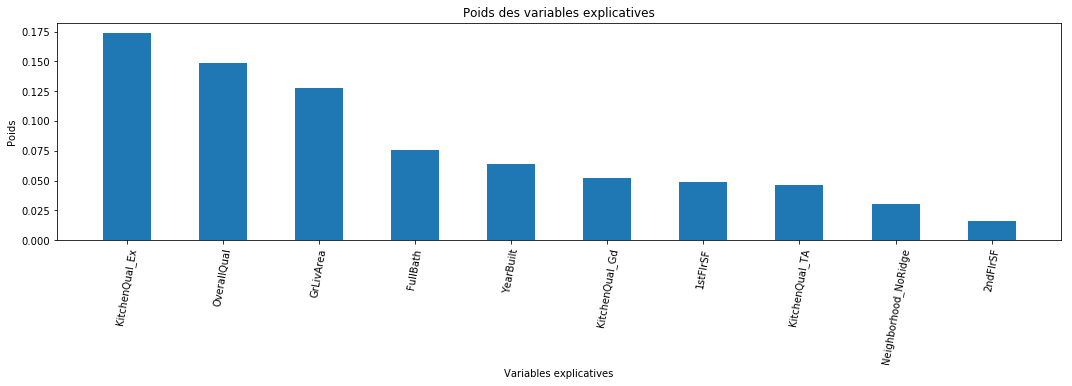

array(['KitchenQual_Ex', 'OverallQual', 'GrLivArea', 'FullBath',
       'YearBuilt', 'KitchenQual_Gd', '1stFlrSF', 'KitchenQual_TA',
       'Neighborhood_NoRidge', '2ndFlrSF'], dtype='<U21')

In [116]:
classifier = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=10)
classifier.fit(train_set[features], train_set[target])
weights = classifier.feature_importances_
features = np.array(features)
explicability(weights, features, first=10)

#### Forward selection

In [117]:
X_train, X_test, y_train, y_test = train_test_split(train_set[features], train_set[target], test_size=0.25)

In [118]:
n_th_most_important_features, score_mean, error_on_mean_score, sort_feat_import_df = score_with_components(
    classifier, X_train, y_train, X_test, y_test, features, weights, M=10, first=50)

ind = 0
ind = 10
ind = 20
ind = 30
ind = 40


/opt/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



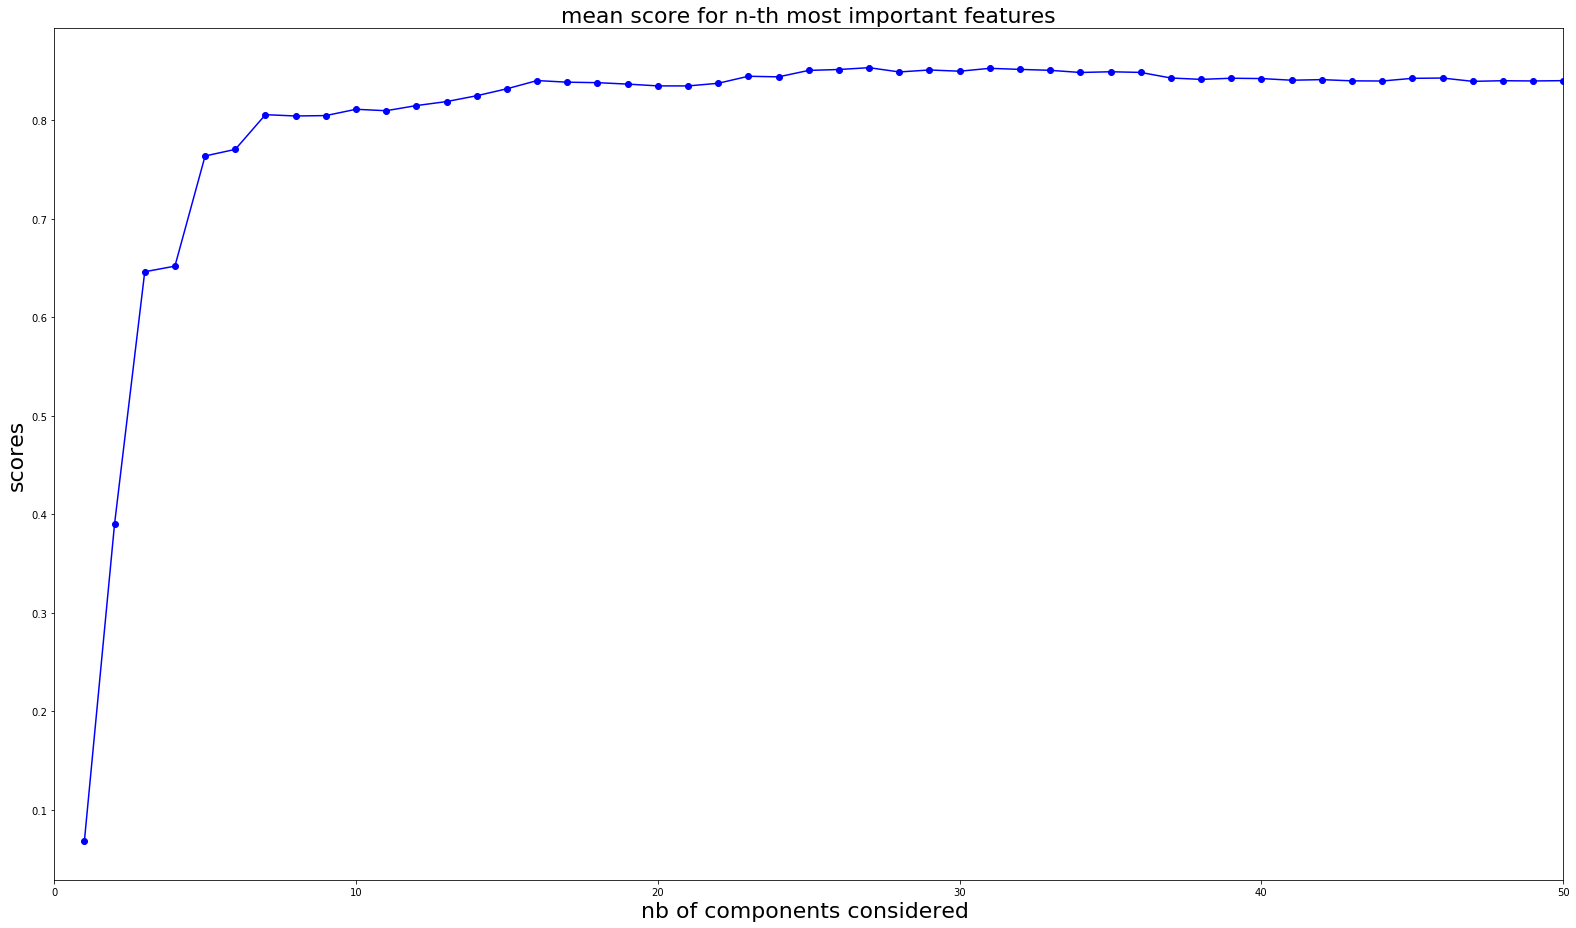

In [119]:
plot_score_with_components(n_th_most_important_features, score_mean, error_on_mean_score, sort_feat_import_df)

As the r2 score is almost plummitting with 22 variables, I chose to retain this value.

In [120]:
features = sort_feat_import_df[:22]["feature_names"].values
features

array(['KitchenQual_Ex', 'OverallQual', 'GrLivArea', 'FullBath',
       'YearBuilt', 'KitchenQual_Gd', '1stFlrSF', 'KitchenQual_TA',
       'Neighborhood_NoRidge', '2ndFlrSF', 'Fireplaces', 'TotRmsAbvGrd',
       'ExterQual_Gd', 'ExterQual_Ex', 'MSZoning_RM', 'LotArea',
       'LandContour_Bnk', 'RoofStyle_Gable', 'HouseStyle_1Story',
       'Neighborhood_NridgHt', 'CentralAir_N', 'OverallCond'],
      dtype=object)

### Training and evaluation

In [121]:
def mae(preds, dtrain):
    labels = dtrain.get_label()
    return np.mean(np.abs(preds - labels))

def mse(preds, dtrain):
    labels = dtrain.get_label()
    return np.mean((preds - labels) **2)

def rmse(preds, dtrain):
    labels = dtrain.get_label()
    return np.sqrt(np.mean((preds - labels) **2))

def rmsle(preds, dtrain):
    labels = dtrain.get_label()
    return np.sqrt(np.mean((np.log(preds + 1) - np.log(labels + 1)) **2))

In [122]:
dtrain = xgb.DMatrix(X_train.values, y_train.values)
dtest = xgb.DMatrix(X_test.values, y_test.values)

param = {
    'max_depth': 4, 'eta': 0.3, 'subsample': 0.9,
    'silent':1, 'objective': 'reg:linear'
}
num_round = 15

bst = xgb.train(param, dtrain, num_round)

In [123]:
pred_test = bst.predict(dtest)

print("rmsle sur le validation set: %.3f" % rmsle(pred_test, dtest))
print("rmse sur le validation set: %.3f" % rmse(pred_test, dtest))
print("mse sur le validation set: %.3f" % mse(pred_test, dtest))
print("mae sur le validation set: %.3f" % mae(pred_test, dtest))

rmsle sur le validation set: 0.168
rmse sur le validation set: 30393.758
mse sur le validation set: 923780544.000
mae sur le validation set: 20915.191


In [124]:
r = pred_test - dtest.get_label()

data = [go.Histogram(x=r)]

layout = go.Layout(dict(title = "Residuals distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

fig = go.Figure(data=data,layout = layout)

py.iplot(fig)

### Training and prediction

In [125]:
dtrain = xgb.DMatrix(train_set[features].values, train_set[target].values)
bst = xgb.train(param, dtrain, num_round)

In [126]:
dtest = xgb.DMatrix(test_set[features].values)
pred_test = bst.predict(dtest)

In [127]:
submission = pd.concat([test_set[key], pd.Series(pred_test, name="SalePrice")], axis=1)
submission.to_csv("submission.csv", index=None, sep=",")